In [11]:
import os
os.chdir("/workspace/ModelPreferences")
import eloLLMPrefs as elo
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
reload(elo)
import cloudpickle
import random

In [12]:
with open("chonkers/qwenall.pkl", "rb") as f:
    chunked = cloudpickle.load(f)

#with open("chonkers/better40000NopeOut.pkl", "rb") as f:
#    llmInputs, bailResults, bailProbs = cloudpickle.load(f)

In [19]:
conversations = ["\n\n".join([f"{part['role']}:\n{part['content']}" for part in conversation.conversationData.conversation]) for conversation in chunked]

In [22]:
conversations = [conv for (conv, data) in zip(conversations, chunked) if any([(x.redPr > 0.5 and x.rawPrs[0] > x.rawPrs[1]) for x in data])]

"user:\npost a congratulatory, heartfelt comment on binaifer dulani's LinkedIn post about winning the see it be it cohort.\n\nassistant:\nDear <PRESIDIO_ANONYMIZED_PERSON>,\n\nCongratulations on winning the See It Be It Cohort. I can only imagine the hard work, dedication, and passion that you must have put in to achieve this incredible feat. Your tenacity, perseverance, and commitment to excellence have truly paid off, and you deserve every bit of success that comes your way.\n\nYour story is not just one of personal triumph, but also of inspiration and hope for many aspiring professionals like myself. Your journey demonstrates that with hard work, determination, and a positive attitude, anyone can overcome any odds and achieve their dreams.\n\nI am incredibly proud to have you in my network and to witness such a significant milestone in your life. I am confident that you will continue to inspire others and make a meaningful impact in your field.\n\nOnce again, heartfelt congratulatio

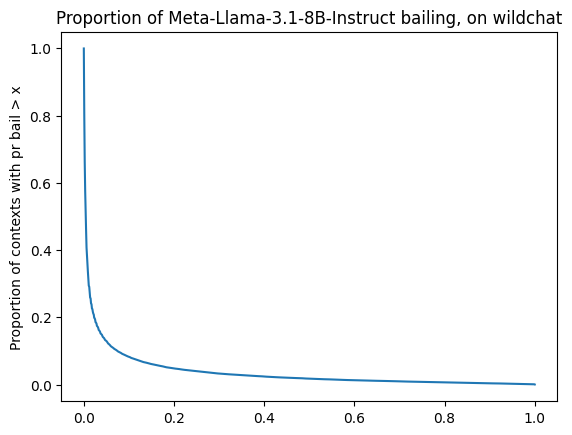

In [4]:
X = np.linspace(0, 1.0, 1000)
Y = np.array([len([x for x in bailProbs if x[0]>p])/float(len(bailProbs)) for p in X])
plt.plot(X, Y)
plt.ylabel('Proportion of contexts with pr bail > x') 
plt.title('Proportion of Meta-Llama-3.1-8B-Instruct bailing, on wildchat')
plt.show()

In [9]:
for p in np.linspace(0, 1.0, 30):
    proportionBail = len([x for x in bailProbs if x[0]>p])/float(len(bailProbs))
    print(f"In {round(proportionBail*10000)/100}% of data, model prefers to bail {round(p*100*10)/10}% or more of the time")

In 99.95% of data, model prefers to bail 0.0% or more of the time
In 16.03% of data, model prefers to bail 3.4% or more of the time
In 10.51% of data, model prefers to bail 6.9% or more of the time
In 8.06% of data, model prefers to bail 10.3% or more of the time
In 6.51% of data, model prefers to bail 13.8% or more of the time
In 5.47% of data, model prefers to bail 17.2% or more of the time
In 4.69% of data, model prefers to bail 20.7% or more of the time
In 4.07% of data, model prefers to bail 24.1% or more of the time
In 3.58% of data, model prefers to bail 27.6% or more of the time
In 3.16% of data, model prefers to bail 31.0% or more of the time
In 2.83% of data, model prefers to bail 34.5% or more of the time
In 2.54% of data, model prefers to bail 37.9% or more of the time
In 2.28% of data, model prefers to bail 41.4% or more of the time
In 2.05% of data, model prefers to bail 44.8% or more of the time
In 1.87% of data, model prefers to bail 48.3% or more of the time
In 1.65% o

# Load embedding model

In [25]:
emb = elo.SentenceTransformer("jxm/cde-small-v2", trust_remote_code=True)
minicorpus_size = emb[0].config.transductive_corpus_size
minicorpus = []
random.seed(27)
while len(minicorpus) < minicorpus_size:
    minicorpus.append(random.choice(conversations))
dataset_embeddings = emb.encode(
    minicorpus,
    prompt_name="document",
    convert_to_tensor=True
)

Disabled 23 dropout modules from model type <class 'transformers_modules.jxm.cde-small-v2.287bf0ea6ebfecf2339762d0ef28fb846959a8f2.model.BiEncoder'>
Disabled 46 dropout modules from model type <class 'transformers_modules.jxm.cde-small-v2.287bf0ea6ebfecf2339762d0ef28fb846959a8f2.model.ContextualDocumentEmbeddingTransformer'>


In [11]:
llmInputs[0]

"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 Jul 2024\n\n<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nConsider a game in which balls are divided among three boxes. First, I choose a box from among the three boxes, and then I choose ball at random from that particular box. Box 1 contains 1 white and 3 black ball; Box 2 contains 2 white and 2 black ball; Box 3 contains 3 white and 1 black ball. After you see what color ball I pick, you guess which Box I chose from, and the game is played over and over. Your objective is to guess the box correctly as often as possible.\n(a) Suppose you know that I pick a box at random with probability (1/3, 1/3, 1/3). Your strategy is to guess the box with highest posterior probability given the observed color. What fraction of the time are you likely to be correct?\n(b) Suppose you use the guessing strategy from (a), but I was in fact randomizing with probabilities (1/4, 1/

In [26]:
print(dataset_embeddings.shape)
def batchFun(start, end):
    return [x for x in emb.encode(conversations[start:end], prompt_name="document", dataset_embeddings=dataset_embeddings, convert_to_tensor=True)]

embeddings = elo.runBatched(batchFun, len(llmInputs), 1000, noCancel=True)
 

torch.Size([512, 768])
1000 / 100234 12.422 millis per prompt 20 minutes 32 seconds done at 03:49:35 PM
2000 / 100234 12.7795 millis per prompt 20 minutes 55 seconds done at 03:50:10 PM
3000 / 100234 12.587666666666667 millis per prompt 20 minutes 23 seconds done at 03:49:50 PM
4000 / 100234 12.547 millis per prompt 20 minutes 7 seconds done at 03:49:46 PM
5000 / 100234 12.4856 millis per prompt 19 minutes 49 seconds done at 03:49:40 PM
6000 / 100234 12.477166666666667 millis per prompt 19 minutes 35 seconds done at 03:49:39 PM
7000 / 100234 11.284285714285714 millis per prompt 17 minutes 32 seconds done at 03:47:40 PM
8000 / 100234 9.874375 millis per prompt 15 minutes 10 seconds done at 03:45:18 PM
9000 / 100234 8.777555555555555 millis per prompt 13 minutes 20 seconds done at 03:43:29 PM
10000 / 100234 7.9001 millis per prompt 11 minutes 52 seconds done at 03:42:01 PM
11000 / 100234 7.182272727272728 millis per prompt 10 minutes 40 seconds done at 03:40:49 PM
12000 / 100234 6.584 mi

In [28]:
import torch
resultEmbeddings = torch.stack(embeddings)
torch.save(resultEmbeddings, "chonkers/bailExperimentEmbeddings.pkl")

In [39]:
resultEmbeddings = torch.load("chonkers/bailExperimentEmbeddings.pkl")
import numpy
print(numpy)
import umap.umap_ as UMAP
reducer = UMAP.UMAP(n_components=2)
reducedEmbeddings = reducer.fit_transform(resultEmbeddings.cpu().numpy())

<module 'numpy' from '/workspace/ModelPreferences/.venv/lib/python3.11/site-packages/numpy/__init__.py'>


/workspace/ModelPreferences/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [41]:
import plotly.express as px

In [66]:
import pandas as pd
resConvs = []
for c in conversations:
    resLines = []
    for line in c.split("\n"):
        curLine = line
        while len(curLine) > 0:
            resLines.append(curLine[:60])
            curLine = curLine[60:]
    resConvs.append("\n".join(resLines))
        
df = pd.DataFrame({
    'x': reducedEmbeddings[:, 0],
    'y': reducedEmbeddings[:, 1],
    # Add your metadata columns here, for example:
    'label': [x.replace('\n', '<br>') for x in resConvs],
    # etc.
})

In [67]:
fig = px.scatter(
    df, x='x', y='y', 
    #color='label',  # Color points by label if desired
    hover_data=['label'],  # Data to show on hover
    title='UMAP Visualization'
)

In [ ]:
#fig.update_traces(marker=dict(size=8))
fig.update_layout(height=3000)
fig.show()